In [24]:
import torch 
ensbn = 20
stride = [16384,]
mft = [1] # 10, 15, 20
bmk = [0, 1]
lt = 32

long_context = []

for s in stride:
    for m in mft:
        for l in [0,]:
            for b in bmk:
                long_context.append(torch.load(f'../../cache/llama/ensemble/qkvout_s{s}_k512_ensbn{ensbn}_query_mft{m}_bmk{b}_lt{lt}__ftdNonel{l}.pth', map_location=torch.device('cpu')))


In [25]:
long_context[0]

{'q': tensor([[[[ 0.1309, -0.7539,  1.3359,  ..., -0.5312,  0.2080, -0.7930],
           [ 0.5781, -0.5312,  0.7461,  ..., -0.7578,  0.4082, -0.8594],
           [ 0.7266, -0.5820,  0.7578,  ..., -0.7578,  0.4082, -0.8594],
           ...,
           [-1.3047, -1.9062, -1.8281,  ..., -0.6836,  0.1631, -0.8828],
           [-0.7891, -2.2812, -2.5000,  ..., -1.3359,  0.6719, -1.4375],
           [-0.2461, -1.9297, -2.2344,  ..., -1.2266,  0.6641, -1.3438]],
 
          [[ 0.5742,  0.1260, -1.4844,  ..., -0.5234,  0.3145, -0.5078],
           [ 2.4062,  1.7031, -0.8047,  ..., -0.2422,  0.1660, -0.2275],
           [ 2.1562,  1.5000, -0.8711,  ..., -0.2422,  0.1660, -0.2275],
           ...,
           [ 0.1260, -0.2441,  0.2275,  ..., -0.1855, -0.4316, -0.0732],
           [-0.0078,  0.0085,  0.4043,  ...,  0.1680, -0.4629,  0.1777],
           [-0.0474,  0.1621,  0.5312,  ...,  0.1543, -0.3867,  0.1572]],
 
          [[-0.7812, -0.7305, -0.7031,  ..., -0.4277, -0.3750, -0.3691],
        

In [26]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, cmap='rainbow'):
    num_attention_maps = tensor.shape[0]
    grid_cols = math.ceil(math.sqrt(num_attention_maps))
    grid_rows = math.ceil(num_attention_maps / grid_cols)
    mask = (tensor == 9999999)
    tensor = torch.where(mask, -1, tensor)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Head {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()

In [20]:
long_context[0]

{'q': tensor([[[[ 4.7656e-01, -5.2344e-01,  3.0078e-01,  ..., -1.1094e+00,
             7.5391e-01,  1.7480e-01],
           [ 6.9922e-01, -7.0703e-01,  3.1445e-01,  ..., -1.0938e+00,
             9.0234e-01,  1.1475e-01],
           [-8.7500e-01,  3.4375e-01, -2.9883e-01,  ..., -1.9297e+00,
             3.2188e+00, -1.8516e+00],
           ...,
           [-8.2031e-02,  4.6484e-01, -1.5234e-01,  ..., -1.8438e+00,
             1.9531e-01, -1.6992e-01],
           [ 2.4902e-01,  7.7344e-01,  4.7266e-01,  ..., -1.5234e+00,
            -4.4141e-01,  6.4844e-01],
           [ 4.1748e-02,  1.2422e+00,  5.0391e-01,  ..., -2.0156e+00,
            -4.6875e-01, -4.0430e-01]],
 
          [[ 4.9375e+00, -7.7734e-01,  4.5312e-01,  ...,  1.7383e-01,
             4.3164e-01,  7.8516e-01],
           [ 6.0000e+00, -1.5469e+00,  5.8203e-01,  ...,  1.0071e-02,
             3.2031e-01,  5.1953e-01],
           [ 1.1641e+00, -2.1680e-01,  8.1641e-01,  ..., -7.2266e-01,
             1.0703e+00,  1.2500e+

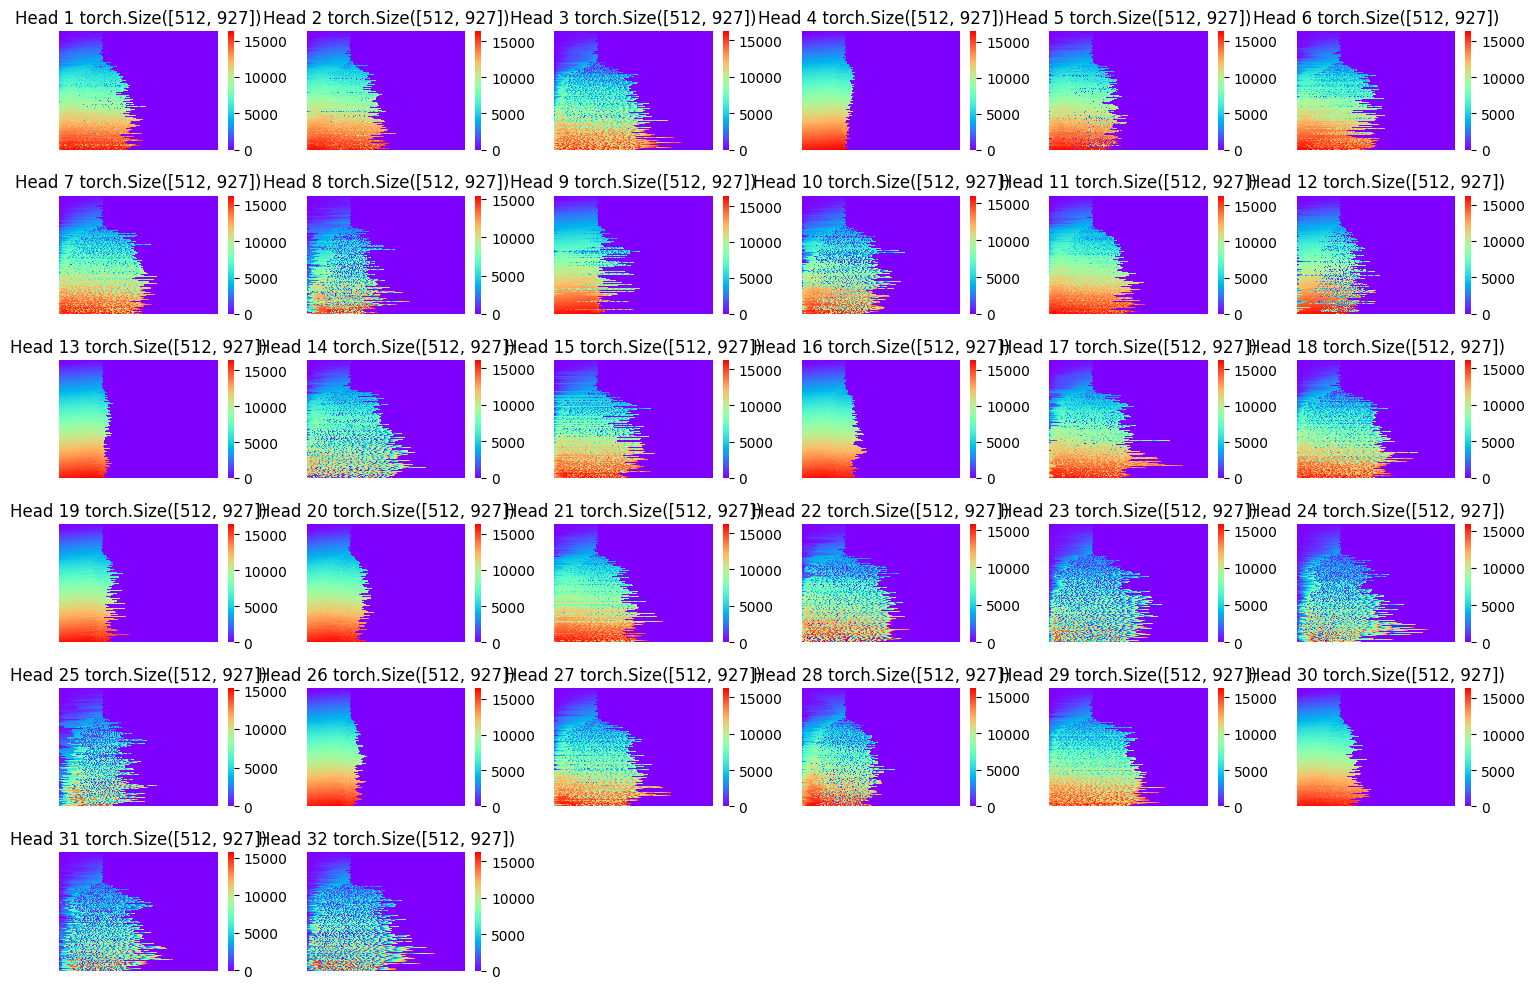

In [27]:
plot_attention_maps(long_context[0]['indices'])

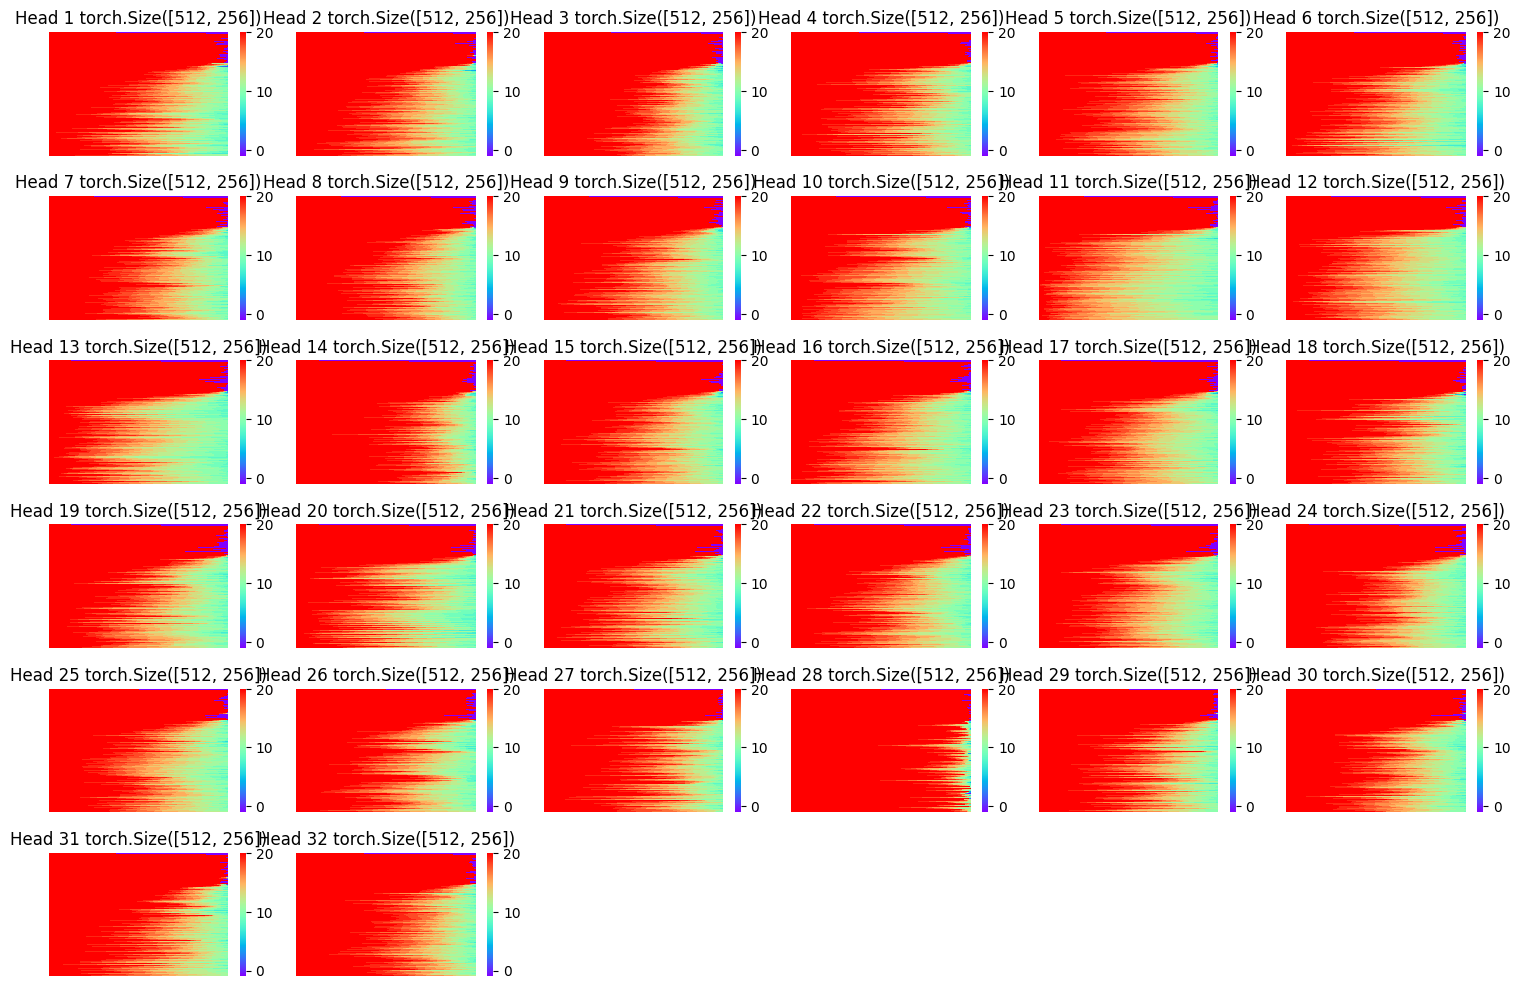

In [22]:
plot_attention_maps(long_context[1]['ensemble_cnt_filtered'])


In [23]:
long_context[1]['ensemble_cnt_filtered']

tensor([[[     20,      20,      20,  ..., 9999999, 9999999, 9999999],
         [     20,      20,      20,  ..., 9999999, 9999999, 9999999],
         [     20,      20,      20,  ..., 9999999, 9999999, 9999999],
         ...,
         [     20,      20,      20,  ...,      11,      10,      10],
         [     20,      20,      20,  ...,      10,      10,      10],
         [     20,      20,      20,  ...,      11,      11,      11]],

        [[     20,      20,      20,  ..., 9999999, 9999999, 9999999],
         [     20,      20,      20,  ..., 9999999, 9999999, 9999999],
         [     20,      20,      20,  ..., 9999999, 9999999, 9999999],
         ...,
         [     20,      20,      20,  ...,       9,       9,       9],
         [     20,      20,      20,  ...,      10,      10,      10],
         [     20,      20,      20,  ...,      10,      10,      10]],

        [[     20,      20,      20,  ..., 9999999, 9999999, 9999999],
         [     20,      20,      20,  ..., 99